In [1]:
%matplotlib inline
#!pip install python-dotenv
#!pip install pydot
import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

import utils

plt.rcParams['figure.figsize'] = (17, 5)

In [2]:
echonest = utils.load('data/fma_metadata/echonest.csv')

echonest.shape

(13129, 249)

In [3]:
echonest.head()

echonest                                                    \
         audio_features                                                     
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476         0.010628  0.177647   
3              0.374408     0.528643  0.817461         0.001851  0.105880   
5              0.043567     0.745566  0.701470         0.000697  0.373143   
10             0.951670     0.658179  0.924525         0.965427  0.115474   
134            0.452217     0.513238  0.560410         0.019443  0.096567   

                                                                        ...  \
                                           metadata                     ...   
         speechiness    tempo   valence  album_date         album_name  ...   
track_id                                                                ...   
2           0.159310  165.922  0.576661         NaN                NaN  ...   
3           0.461818  126.957  0.269240         NaN                NaN  ...   
5           0.124595  100.260  0.621661         NaN                NaN  ...   
10          0.032985  111.562  0.963590  2008-03-11  Constant Hitmaker  ...   
134         0.525519  114.290  0.894072         NaN                NaN  ...   

                                                                              \
         temporal_features                                                     
                       214        215       216       217       218      219   
track_id                                                                       
2                -1.992303   6.805694  0.233070  0.192880  0.027455  0.06408   
3                -1.582331   8.889308  0.258464  0.220905  0.081368  0.06413   
5                -2.288358  11.527109  0.256821  0.237820  0.060122  0.06014   
10               -3.662988  21.508228  0.283352  0.267070  0.125704  0.08082   
134              -1.452696   2.356398  0.234686  0.199550  0.149332  0.06440   

                                                     
                                                     
               220       221        222         223  
track_id                                             
2          3.67696   3.61288  13.316690  262.929749  
3          6.08277   6.01864  16.673548  325.581085  
5          5.92649   5.86635  16.013849  356.755737  
10         8.41401   8.33319  21.317064  483.403809  
134       11.26707  11.20267  26.454180  751.147705  

[5 rows x 249 columns]

In [4]:
echonest.columns.tolist()

[('echonest', 'audio_features', 'acousticness'),
 ('echonest', 'audio_features', 'danceability'),
 ('echonest', 'audio_features', 'energy'),
 ('echonest', 'audio_features', 'instrumentalness'),
 ('echonest', 'audio_features', 'liveness'),
 ('echonest', 'audio_features', 'speechiness'),
 ('echonest', 'audio_features', 'tempo'),
 ('echonest', 'audio_features', 'valence'),
 ('echonest', 'metadata', 'album_date'),
 ('echonest', 'metadata', 'album_name'),
 ('echonest', 'metadata', 'artist_latitude'),
 ('echonest', 'metadata', 'artist_location'),
 ('echonest', 'metadata', 'artist_longitude'),
 ('echonest', 'metadata', 'artist_name'),
 ('echonest', 'metadata', 'release'),
 ('echonest', 'ranks', 'artist_discovery_rank'),
 ('echonest', 'ranks', 'artist_familiarity_rank'),
 ('echonest', 'ranks', 'artist_hotttnesss_rank'),
 ('echonest', 'ranks', 'song_currency_rank'),
 ('echonest', 'ranks', 'song_hotttnesss_rank'),
 ('echonest', 'social_features', 'artist_discovery'),
 ('echonest', 'social_featur

In [9]:
columns = ['audio_features', 'metadata', 'ranks', 'social_features', 'temporal_features']
echonest_columns = columns
for c in echonest_columns:
     ipd.display(echonest['echonest', c].head())

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


,album_date,album_name,artist_latitude,artist_location,artist_longitude,artist_name,release
track_id,,,,,,,
2,NaN,NaN,32.6783,"Georgia, US",-83.2230,AWOL,AWOL - A Way Of Life
3,NaN,NaN,32.6783,"Georgia, US",-83.2230,AWOL,AWOL - A Way Of Life
5,NaN,NaN,32.6783,"Georgia, US",-83.2230,AWOL,AWOL - A Way Of Life
10,2008-03-11,Constant Hitmaker,39.9523,"Philadelphia, PA, US",-75.1624,Kurt Vile,Constant Hitmaker
134,NaN,NaN,32.6783,"Georgia, US",-83.2230,AWOL,AWOL - A Way Of Life


,artist_discovery_rank,artist_familiarity_rank,artist_hotttnesss_rank,song_currency_rank,song_hotttnesss_rank
track_id,,,,,
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
10,2635.0,2544.0,397.0,115691.0,67609.0
134,NaN,NaN,NaN,NaN,NaN


,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss
track_id,,,,,
2,0.388990,0.386740,0.406370,0.000000,0.000000
3,0.388990,0.386740,0.406370,0.000000,0.000000
5,0.388990,0.386740,0.406370,0.000000,0.000000
10,0.557339,0.614272,0.798387,0.005158,0.354516
134,0.388990,0.386740,0.406370,0.000000,0.000000


,000,001,002,003,004,005,006,007,008,009,...,214,215,216,217,218,219,220,221,222,223
track_id,,,,,,,,,,,,,,,,,,,,,
2,0.877233,0.588911,0.354243,0.295090,0.298413,0.309430,0.304496,0.334579,0.249495,0.259656,...,-1.992303,6.805694,0.233070,0.192880,0.027455,0.06408,3.67696,3.61288,13.316690,262.929749
3,0.534429,0.537414,0.443299,0.390879,0.344573,0.366448,0.419455,0.747766,0.460901,0.392379,...,-1.582331,8.889308,0.258464,0.220905,0.081368,0.06413,6.08277,6.01864,16.673548,325.581085
5,0.548093,0.720192,0.389257,0.344934,0.361300,0.402543,0.434044,0.388137,0.512487,0.525755,...,-2.288358,11.527109,0.256821,0.237820,0.060122,0.06014,5.92649,5.86635,16.013849,356.755737
10,0.311404,0.711402,0.321914,0.500601,0.250963,0.321316,0.734250,0.325188,0.373012,0.235840,...,-3.662988,21.508228,0.283352,0.267070,0.125704,0.08082,8.41401,8.33319,21.317064,483.403809
134,0.610849,0.569169,0.428494,0.345796,0.376920,0.460590,0.401371,0.449900,0.428946,0.446736,...,-1.452696,2.356398,0.234686,0.199550,0.149332,0.06440,11.26707,11.20267,26.454180,751.147705


## audio_features

In [10]:
audio_features=echonest['echonest','audio_features'] 

In [11]:
audio_features.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

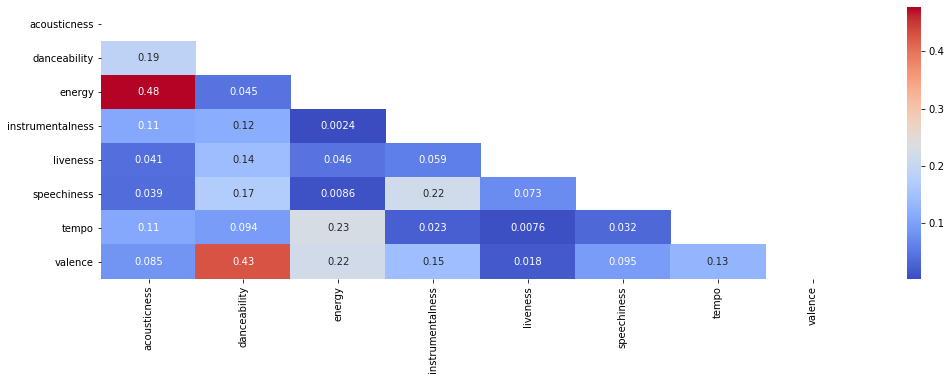

In [12]:
corr=audio_features.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask);
plt.xticks(rotation=90)

In [10]:
audio_features.isnull().sum() 

acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
speechiness         0
tempo               0
valence             0
dtype: int64

In [11]:
audio_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 2 to 124911
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      13129 non-null  float64
 1   danceability      13129 non-null  float64
 2   energy            13129 non-null  float64
 3   instrumentalness  13129 non-null  float64
 4   liveness          13129 non-null  float64
 5   speechiness       13129 non-null  float64
 6   tempo             13129 non-null  float64
 7   valence           13129 non-null  float64
dtypes: float64(8)
memory usage: 923.1 KB


In [12]:
audio_features.describe() 

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,1.312900e+04,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000
mean,5.246876e-01,0.487290,0.537516,0.640536,0.187804,0.099174,123.080061,0.439761
std,3.837186e-01,0.190148,0.278049,0.361430,0.158051,0.137381,35.015137,0.276028
min,9.035000e-07,0.051307,0.000020,0.000000,0.025297,0.022324,12.753000,0.000010
25%,1.037726e-01,0.344759,0.321300,0.323466,0.101406,0.036932,95.967000,0.197321
50%,5.739848e-01,0.485635,0.549113,0.838134,0.119002,0.049019,120.057000,0.417743
75%,9.207270e-01,0.629094,0.776254,0.918244,0.211041,0.085452,145.318000,0.665575
max,9.957965e-01,0.968645,0.999964,0.998016,0.980330,0.966177,251.072000,0.999990


## acousticness

In [15]:
audio_features['acousticness'].value_counts()

0.995796    217
0.995761      2
0.995560      2
0.995467      2
0.995770      2
           ... 
0.307138      1
0.708678      1
0.995774      1
0.888311      1
0.077081      1
Name: acousticness, Length: 12905, dtype: int64

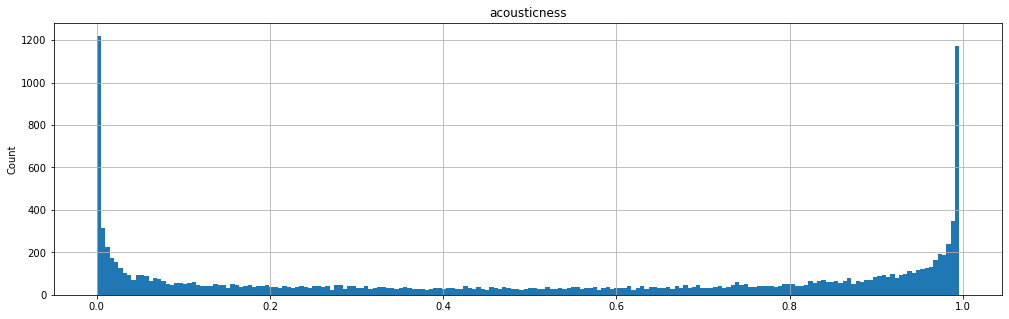

In [23]:
#plt.figure(figsize=(20, 15))

audio_features['acousticness'].hist(bins=200)
plt.title("acousticness")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

distribuzione uniforme nei valori centrali con grandissimi picchi di valori vicini a 1 e vicini a 0

not null value

attributo numerico continuo

## danceability

In [19]:
audio_features['danceability'].value_counts()

0.570842    1
0.660031    1
0.351418    1
0.698076    1
0.825258    1
           ..
0.254398    1
0.648909    1
0.766721    1
0.515324    1
0.296687    1
Name: danceability, Length: 13129, dtype: int64

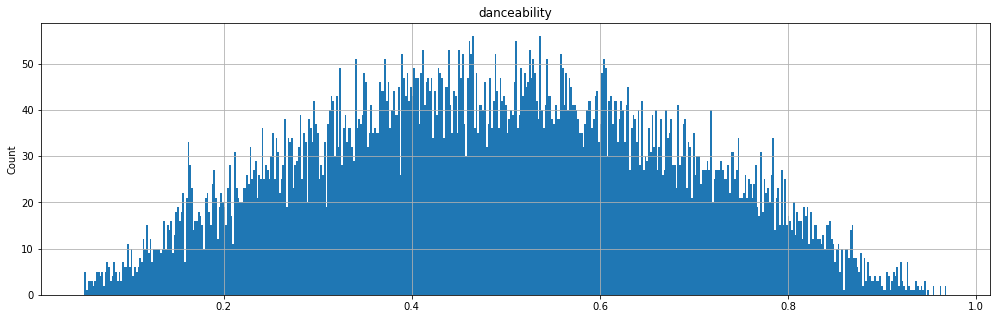

In [21]:
#plt.figure(figsize=(20, 15))

audio_features['danceability'].hist(bins=500)
plt.title("danceability")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

distribuzione di gauss

not null value 

attributo numerico continuo

## energy

In [25]:
audio_features['energy'].value_counts()

0.480484    1
0.924320    1
0.496466    1
0.453047    1
0.559173    1
           ..
0.413160    1
0.311271    1
0.375160    1
0.720750    1
0.847495    1
Name: energy, Length: 13129, dtype: int64

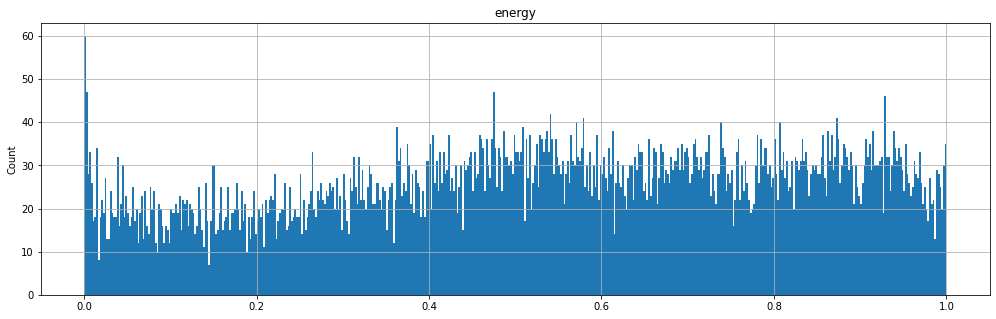

In [26]:
#plt.figure(figsize=(20, 15))

audio_features['energy'].hist(bins=500)
plt.title("energy")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

distribuzione abbastanza uniforme con un picco vicino al valore zero

not null value

attributo numerico continuo

## instrumentalness

In [27]:
audio_features['instrumentalness'].value_counts()

9.728700e-01    51
0.000000e+00    38
3.000000e-10    12
2.000000e-10     9
1.000000e-10     9
                ..
9.130954e-01     1
9.096086e-01     1
5.136750e-02     1
9.298837e-01     1
9.163020e-01     1
Name: instrumentalness, Length: 12969, dtype: int64

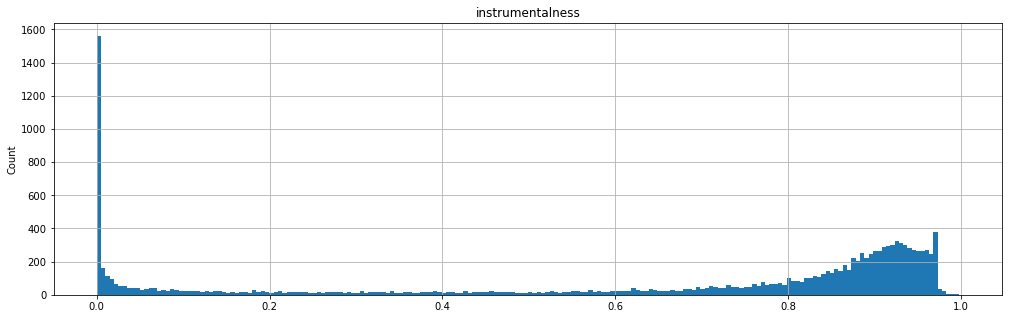

In [29]:
audio_features['instrumentalness'].hist(bins=200)
plt.title("instrumentalness")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

distribuzione di valori con picco importante vicino a zero, e una curva in aumento da 0.8 in poi

not null value

attributo numerico continuo

## liveness          

In [31]:
audio_features['liveness'].value_counts()

0.111568    2
0.111674    1
0.608446    1
0.384854    1
0.337788    1
           ..
0.095551    1
0.221311    1
0.103316    1
0.076593    1
0.131394    1
Name: liveness, Length: 13128, dtype: int64

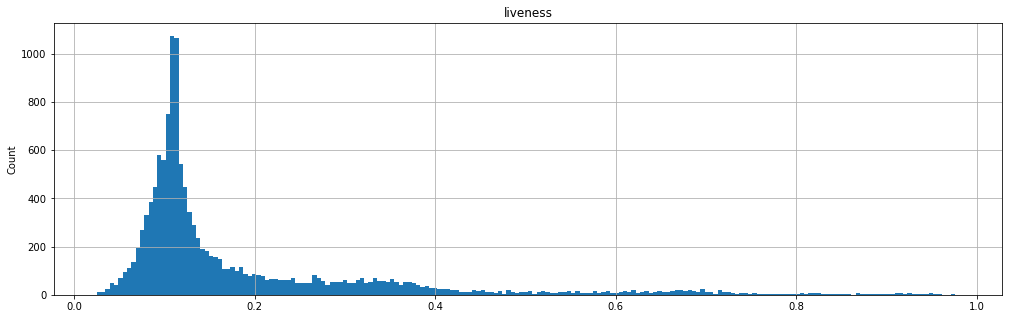

In [32]:
audio_features['liveness'].hist(bins=200)
plt.title("liveness")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live.

distribuzione simil gauss con picco a 0.1, poi lunga coda da 0.2 fino a 1

not null value

attributo numerico continuo

## speechiness       

In [34]:
audio_features['speechiness'].value_counts()

0.039630    1
0.065964    1
0.050564    1
0.037217    1
0.054022    1
           ..
0.108764    1
0.076358    1
0.063774    1
0.080266    1
0.089616    1
Name: speechiness, Length: 13129, dtype: int64

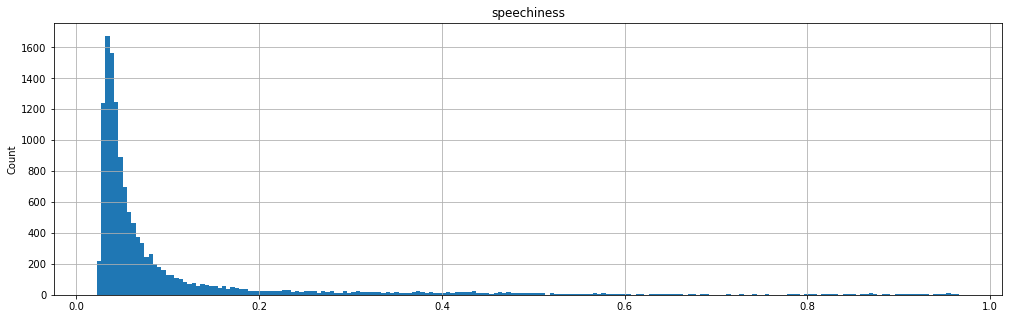

In [35]:
audio_features['speechiness'].hist(bins=200)
plt.title("speechiness")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audiobook, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

distribuzione con picco tra 0 e 0.1, poi lunga coda

not null value

attributo numerico continuo

## tempo

In [36]:
audio_features['tempo'].value_counts()

120.007    7
120.004    7
100.010    6
120.010    6
120.028    6
          ..
201.026    1
112.201    1
137.391    1
108.016    1
122.000    1
Name: tempo, Length: 11902, dtype: int64

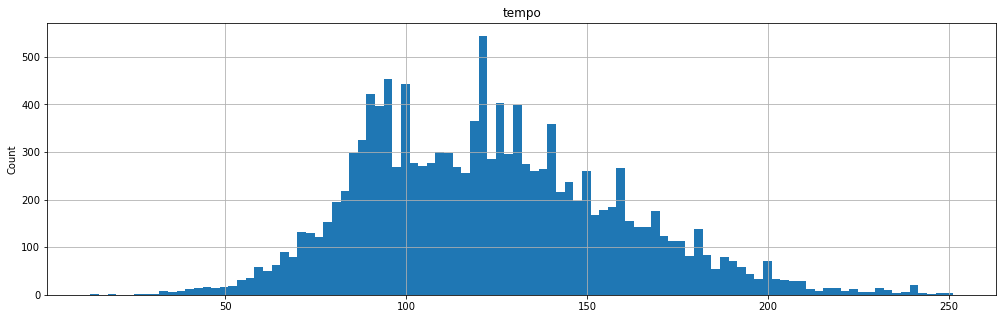

In [38]:
audio_features['tempo'].hist(bins=100)
plt.title("tempo")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

distribuzione simil gauss con maggior parte dei valori tra 75 e 175

not null value

attributo numerico continuo


## valence

In [40]:
audio_features['valence'].value_counts()

0.999990    3
0.620683    1
0.084293    1
0.865308    1
0.923660    1
           ..
0.039191    1
0.142331    1
0.037983    1
0.119317    1
0.625140    1
Name: valence, Length: 13127, dtype: int64

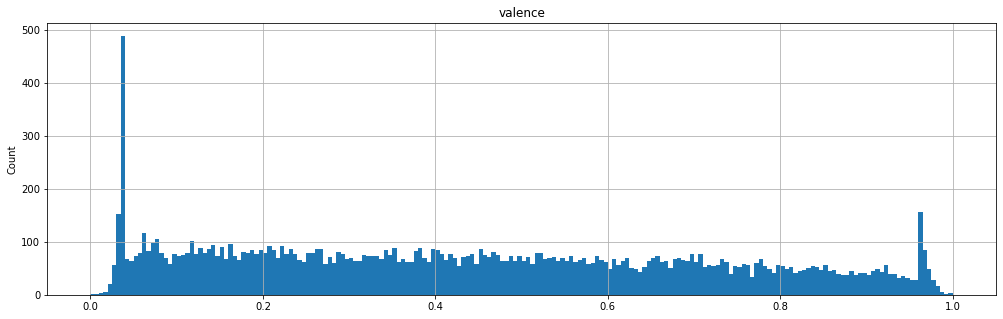

In [42]:
audio_features['valence'].hist(bins=200)
plt.title("valence")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

distribuzione uniforme con grandissimo picco tra 0 e 0.1 e piccolo picco vicino a 1

not null value

attributo numerico continuo

## metadata

In [44]:
metadata=echonest['echonest','metadata'] 

In [45]:
metadata.head()

,album_date,album_name,artist_latitude,artist_location,artist_longitude,artist_name,release
track_id,,,,,,,
2,NaN,NaN,32.6783,"Georgia, US",-83.2230,AWOL,AWOL - A Way Of Life
3,NaN,NaN,32.6783,"Georgia, US",-83.2230,AWOL,AWOL - A Way Of Life
5,NaN,NaN,32.6783,"Georgia, US",-83.2230,AWOL,AWOL - A Way Of Life
10,2008-03-11,Constant Hitmaker,39.9523,"Philadelphia, PA, US",-75.1624,Kurt Vile,Constant Hitmaker
134,NaN,NaN,32.6783,"Georgia, US",-83.2230,AWOL,AWOL - A Way Of Life


In [47]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 2 to 124911
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   album_date        2717 non-null   object 
 1   album_name        2872 non-null   object 
 2   artist_latitude   9770 non-null   float64
 3   artist_location   9770 non-null   object 
 4   artist_longitude  9770 non-null   float64
 5   artist_name       13129 non-null  object 
 6   release           13129 non-null  object 
dtypes: float64(2), object(5)
memory usage: 820.6+ KB


In [46]:
metadata.isnull().sum() 

album_date          10412
album_name          10257
artist_latitude      3359
artist_location      3359
artist_longitude     3359
artist_name             0
release                 0
dtype: int64

In [49]:
metadata

,album_date,album_name,artist_latitude,artist_location,artist_longitude,artist_name,release
track_id,,,,,,,
2,NaN,NaN,32.6783,"Georgia, US",-83.22300,AWOL,AWOL - A Way Of Life
3,NaN,NaN,32.6783,"Georgia, US",-83.22300,AWOL,AWOL - A Way Of Life
5,NaN,NaN,32.6783,"Georgia, US",-83.22300,AWOL,AWOL - A Way Of Life
10,2008-03-11,Constant Hitmaker,39.9523,"Philadelphia, PA, US",-75.16240,Kurt Vile,Constant Hitmaker
134,NaN,NaN,32.6783,"Georgia, US",-83.22300,AWOL,AWOL - A Way Of Life
...,...,...,...,...,...,...,...
124857,NaN,NaN,52.1082,Netherlands,5.32986,Basic,Do You Know The Word
124862,NaN,NaN,52.1082,Netherlands,5.32986,Basic,Do You Know The Word
124863,NaN,NaN,52.1082,Netherlands,5.32986,Basic,Do You Know The Word


In [50]:
tracks = utils.load('data/fma_metadata/tracks.csv')

tracks.shape

(106574, 52)

In [78]:

df3 = pd.merge(tracks, metadata, left_index=True, right_index=True)
print (df3)

C:\Users\Federico\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


          (album, comments) (album, date_created) (album, date_released)  \
track_id                                                                   
2                         0   2008-11-26 01:44:45             2009-01-05   
3                         0   2008-11-26 01:44:45             2009-01-05   
5                         0   2008-11-26 01:44:45             2009-01-05   
10                        0   2008-11-26 01:45:08             2008-02-06   
134                       0   2008-11-26 01:44:45             2009-01-05   
...                     ...                   ...                    ...   
124857                    0   2015-09-09 14:39:58             2006-02-06   
124862                    0   2015-09-09 14:39:58             2006-02-06   
124863                    0   2015-09-09 14:39:58             2006-02-06   
124864                    0   2015-09-09 14:39:58             2006-02-06   
124911                    0   2015-09-11 12:08:44             2010-09-23   

         (a

In [79]:
df3

,"(album, comments)","(album, date_created)","(album, date_released)","(album, engineer)","(album, favorites)","(album, id)","(album, information)","(album, listens)","(album, producer)","(album, tags)",...,"(track, publisher)","(track, tags)","(track, title)",album_date,album_name,artist_latitude,artist_location,artist_longitude,artist_name,release
track_id,,,,,,,,,,,,,,,,,,,,,
2,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,NaN,[],Food,NaN,NaN,32.6783,"Georgia, US",-83.22300,AWOL,AWOL - A Way Of Life
3,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,NaN,[],Electric Ave,NaN,NaN,32.6783,"Georgia, US",-83.22300,AWOL,AWOL - A Way Of Life
5,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,NaN,[],This World,NaN,NaN,32.6783,"Georgia, US",-83.22300,AWOL,AWOL - A Way Of Life
10,0,2008-11-26 01:45:08,2008-02-06,NaN,4,6,NaN,47632,NaN,[],...,NaN,[],Freeway,2008-03-11,Constant Hitmaker,39.9523,"Philadelphia, PA, US",-75.16240,Kurt Vile,Constant Hitmaker
134,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,NaN,[],Street Music,NaN,NaN,32.6783,"Georgia, US",-83.22300,AWOL,AWOL - A Way Of Life
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124857,0,2015-09-09 14:39:58,2006-02-06,Daan Hendriks,0,18862,"<p>""Do you know a word that means both look at...",55904,Daan Hendriks,[],...,NaN,[],I'm Wearing My Dancing Pants,NaN,NaN,52.1082,Netherlands,5.32986,Basic,Do You Know The Word
124862,0,2015-09-09 14:39:58,2006-02-06,Daan Hendriks,0,18862,"<p>""Do you know a word that means both look at...",55904,Daan Hendriks,[],...,NaN,[],Me Funky You Jane,NaN,NaN,52.1082,Netherlands,5.32986,Basic,Do You Know The Word
124863,0,2015-09-09 14:39:58,2006-02-06,Daan Hendriks,0,18862,"<p>""Do you know a word that means both look at...",55904,Daan Hendriks,[],...,NaN,[],Ain't Mad at Ya,NaN,NaN,52.1082,Netherlands,5.32986,Basic,Do You Know The Word


In [80]:
df3=df3.drop([('track', 'lyricist'),('track', 'publisher'),('track', 'information'),('track', 'composer'),
                    ('track', 'date_recorded'), ('artist', 'active_year_end'),  ('artist', 'wikipedia_page'),('set', 'split'), ('artist', 'website'),  ('artist', 'bio'),('track', 'language_code'),('artist', 'related_projects'),('artist', 'associated_labels'),('artist', 'active_year_begin'),
                    ('album', 'producer'), ('album', 'engineer'),('artist', 'longitude'),('artist', 'latitude'),('album', 'information'),('artist', 'members'),('album', 'date_created'),('artist', 'date_created'),('track', 'date_created'),
                     ('album','comments'), ('album','favorites'), ('album','listens'), ('album','tags'), ('album','tracks'), ('album','type'),('track','number'), ('track','tags'), ('track','publisher'),('track','listens'), ('artist_latitude'), ('artist_longitude'),
         ('track','license'), ('artist','tags'), ('artist','comments'),('artist','tags'),('track','bit_rate'), ('track','comments'),('track','genres'),('track','genres_all'),
         ('track','interest'),('track','license'), ('track','duration'), ('track','favorites'),('artist','favorites')], axis = 1)

In [81]:
pd.set_option('display.max_rows', 500)

In [82]:
df3.head(500)

,"(album, date_released)","(album, id)","(album, title)","(artist, id)","(artist, location)","(artist, name)","(set, subset)","(track, genre_top)","(track, title)",album_date,album_name,artist_location,artist_name,release
track_id,,,,,,,,,,,,,,
2,2009-01-05,1,AWOL - A Way Of Life,1,New Jersey,AWOL,small,Hip-Hop,Food,NaN,NaN,"Georgia, US",AWOL,AWOL - A Way Of Life
3,2009-01-05,1,AWOL - A Way Of Life,1,New Jersey,AWOL,medium,Hip-Hop,Electric Ave,NaN,NaN,"Georgia, US",AWOL,AWOL - A Way Of Life
5,2009-01-05,1,AWOL - A Way Of Life,1,New Jersey,AWOL,small,Hip-Hop,This World,NaN,NaN,"Georgia, US",AWOL,AWOL - A Way Of Life
10,2008-02-06,6,Constant Hitmaker,6,NaN,Kurt Vile,small,Pop,Freeway,2008-03-11,Constant Hitmaker,"Philadelphia, PA, US",Kurt Vile,Constant Hitmaker
134,2009-01-05,1,AWOL - A Way Of Life,1,New Jersey,AWOL,medium,Hip-Hop,Street Music,NaN,NaN,"Georgia, US",AWOL,AWOL - A Way Of Life
139,2009-01-16,60,Every Man For Himself,54,"Providence, RI",Alec K. Redfearn & the Eyesores,medium,Folk,CandyAss,NaN,NaN,"Providence, RI, US",Alec K. Redfearn and the Eyesores,Every Man For Himself
140,2007-05-22,61,The Blind Spot,54,"Providence, RI",Alec K. Redfearn & the Eyesores,small,Folk,Queen Of The Wires,NaN,NaN,"Providence, RI, US",Alec K. Redfearn and the Eyesores,The Blind Spot
141,2009-01-16,60,Every Man For Himself,54,"Providence, RI",Alec K. Redfearn & the Eyesores,small,Folk,Ohio,NaN,NaN,"Providence, RI, US",Alec K. Redfearn and the Eyesores,Every Man For Himself
142,2005-01-25,62,The Quiet Room,54,"Providence, RI",Alec K. Redfearn & the Eyesores,large,Folk,Punjabi Watery Grave,2005,The Quiet Room,"Providence, RI, US",Alec K. Redfearn and the Eyesores,The Quiet Room


In [84]:
mediumSet=df3.loc[df3[('set','subset')] != 'large']
mediumSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5281 entries, 2 to 124402
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   (album, date_released)  3734 non-null   datetime64[ns]
 1   (album, id)             5281 non-null   int64         
 2   (album, title)          5281 non-null   object        
 3   (artist, id)            5281 non-null   int64         
 4   (artist, location)      3471 non-null   object        
 5   (artist, name)          5281 non-null   object        
 6   (set, subset)           5281 non-null   category      
 7   (track, genre_top)      5281 non-null   category      
 8   (track, title)          5281 non-null   object        
 9   album_date              1301 non-null   object        
 10  album_name              1332 non-null   object        
 11  artist_location         3960 non-null   object        
 12  artist_name             5281 non-null   object

In [85]:
largeSet=df3.loc[df3[('set','subset')] == 'large']
largeSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7848 entries, 142 to 124911
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   (album, date_released)  5578 non-null   datetime64[ns]
 1   (album, id)             7848 non-null   int64         
 2   (album, title)          7848 non-null   object        
 3   (artist, id)            7848 non-null   int64         
 4   (artist, location)      5612 non-null   object        
 5   (artist, name)          7848 non-null   object        
 6   (set, subset)           7848 non-null   category      
 7   (track, genre_top)      4074 non-null   category      
 8   (track, title)          7847 non-null   object        
 9   album_date              1416 non-null   object        
 10  album_name              1540 non-null   object        
 11  artist_location         5810 non-null   object        
 12  artist_name             7848 non-null   obje

In [86]:
metadata.head()

,album_date,album_name,artist_latitude,artist_location,artist_longitude,artist_name,release
track_id,,,,,,,
2,NaN,NaN,32.6783,"Georgia, US",-83.2230,AWOL,AWOL - A Way Of Life
3,NaN,NaN,32.6783,"Georgia, US",-83.2230,AWOL,AWOL - A Way Of Life
5,NaN,NaN,32.6783,"Georgia, US",-83.2230,AWOL,AWOL - A Way Of Life
10,2008-03-11,Constant Hitmaker,39.9523,"Philadelphia, PA, US",-75.1624,Kurt Vile,Constant Hitmaker
134,NaN,NaN,32.6783,"Georgia, US",-83.2230,AWOL,AWOL - A Way Of Life


In [87]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 2 to 124911
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   album_date        2717 non-null   object 
 1   album_name        2872 non-null   object 
 2   artist_latitude   9770 non-null   float64
 3   artist_location   9770 non-null   object 
 4   artist_longitude  9770 non-null   float64
 5   artist_name       13129 non-null  object 
 6   release           13129 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.4+ MB


In [89]:
metadata.isnull().sum()


album_date          10412
album_name          10257
artist_latitude      3359
artist_location      3359
artist_longitude     3359
artist_name             0
release                 0
dtype: int64

attraverso track_id ho visto che questi record sono un sottoinsieme del dataset tracks. I metadata qui sono meno precisi rispetto a quelli presenti in tracks, per questo non andrebbero considerati. Ci sono molti valori null in album_date che non ci sono in tracks per esempio. release contiene il nome dell'album, artist_name quello dell'artista, corrispondono ai valori presenti in tracks ma può cambiare qualche maiuscola. La location non combacia in molti record rispetto a tracks.  

13129  record sono presenti in questo dataset

7848 appartengono a large

5281 appartengono a medium + small

## ranks

In [91]:
ranks=echonest['echonest','ranks'] 

In [92]:
ranks.head()

,artist_discovery_rank,artist_familiarity_rank,artist_hotttnesss_rank,song_currency_rank,song_hotttnesss_rank
track_id,,,,,
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
10,2635.0,2544.0,397.0,115691.0,67609.0
134,NaN,NaN,NaN,NaN,NaN


In [93]:
ranks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 2 to 124911
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   artist_discovery_rank    2825 non-null   float64
 1   artist_familiarity_rank  2825 non-null   float64
 2   artist_hotttnesss_rank   2824 non-null   float64
 3   song_currency_rank       2033 non-null   float64
 4   song_hotttnesss_rank     2206 non-null   float64
dtypes: float64(5)
memory usage: 1.2 MB


In [94]:
ranks.isnull().sum()

artist_discovery_rank      10304
artist_familiarity_rank    10304
artist_hotttnesss_rank     10305
song_currency_rank         11096
song_hotttnesss_rank       10923
dtype: int64

talmente tanti null value su tutti questi attributi che non vale la pena neanche di studiarli

## social_features

In [14]:
social_features=echonest['echonest','social_features'] 

In [15]:
social_features.head()

,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss
track_id,,,,,
2,0.388990,0.386740,0.406370,0.000000,0.000000
3,0.388990,0.386740,0.406370,0.000000,0.000000
5,0.388990,0.386740,0.406370,0.000000,0.000000
10,0.557339,0.614272,0.798387,0.005158,0.354516
134,0.388990,0.386740,0.406370,0.000000,0.000000


In [16]:
social_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 2 to 124911
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artist_discovery    13129 non-null  float64
 1   artist_familiarity  13129 non-null  float64
 2   artist_hotttnesss   13129 non-null  float64
 3   song_currency       13129 non-null  float64
 4   song_hotttnesss     13129 non-null  float64
dtypes: float64(5)
memory usage: 615.4 KB


In [101]:
social_features.isnull().sum()

artist_discovery      0
artist_familiarity    0
artist_hotttnesss     0
song_currency         0
song_hotttnesss       0
dtype: int64

In [108]:
social_features.describe()


,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss
count,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000
mean,0.321996,0.286287,0.346769,0.000234,0.033308
std,0.114619,0.128304,0.133279,0.001474,0.061965
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.254517,0.205872,0.265889,0.000000,0.000000
50%,0.328672,0.284111,0.343653,0.000000,0.000000
75%,0.414481,0.359271,0.451625,0.000100,0.043971
max,0.667799,0.819393,0.808122,0.052118,0.513594


## artist_discovery

In [102]:
social_features['artist_discovery'].value_counts()

0.443525    94
0.380089    81
0.322278    67
0.282139    65
0.105377    64
            ..
0.154550     1
0.484397     1
0.389892     1
0.447968     1
0.420687     1
Name: artist_discovery, Length: 2860, dtype: int64

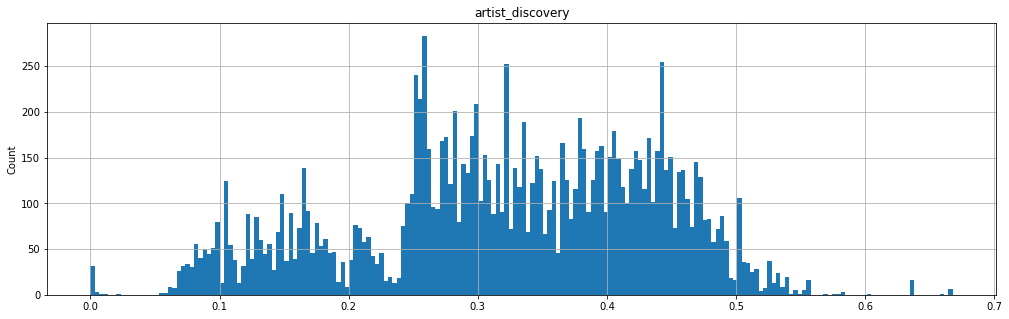

In [103]:
social_features['artist_discovery'].hist(bins=200)
plt.title("artist_discovery")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

artist_discovery non capisco il significato di questo attributo

## artist_familiarity

In [104]:
social_features['artist_familiarity'].value_counts()

0.361999    94
0.546272    81
0.284111    67
0.254317    65
0.162315    64
            ..
0.230874     1
0.405808     1
0.347544     1
0.357826     1
0.124505     1
Name: artist_familiarity, Length: 2806, dtype: int64

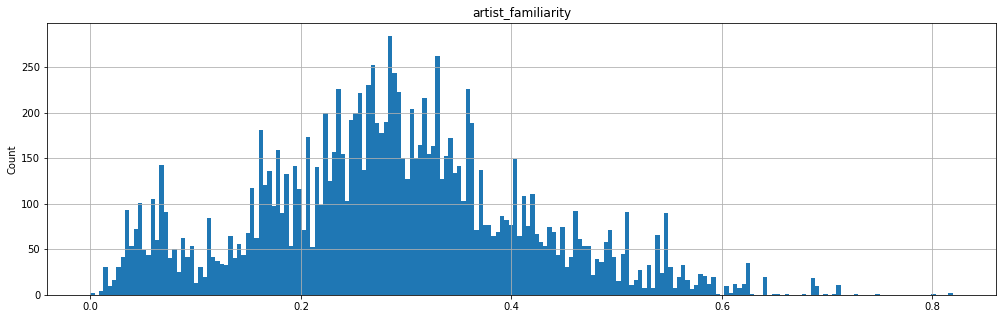

In [107]:
social_features['artist_familiarity'].hist(bins=200)
plt.title("artist_familiarity")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

artist_familiarity attributo che indica quanto è familiare (famoso) questo artista

distribuzione bimodale

not null value

attrbuto numerico continuo con valori tra 0 e 1

## artist_hotttnesss     

In [110]:
social_features['artist_hotttnesss'].value_counts()

0.463342    94
0.488807    81
0.336677    67
0.294745    65
0.110085    64
            ..
0.552014     1
0.687353     1
0.301640     1
0.362075     1
0.357871     1
Name: artist_hotttnesss, Length: 2854, dtype: int64

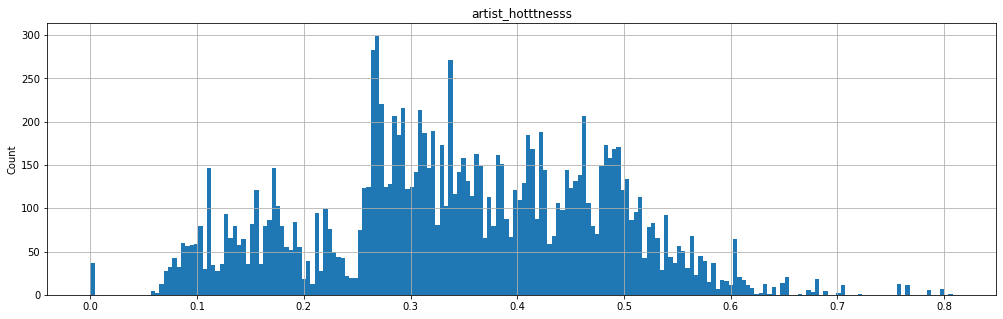

In [111]:
social_features['artist_hotttnesss'].hist(bins=200)
plt.title("artist_hotttnesss")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

artist_hotttnesss attributo che indica quanto è presente questo artista nelle classifiche e quanto spesso viene riprodotto. Mangari è un nuovo artista quindi non è familiare ma è primo in classifica

not null value

attrbuto numerico continuo con valori tra 0 e 1

## song_currency

In [112]:
social_features['song_currency'].value_counts()

0.000000    8385
0.000250     808
0.000500     349
0.000750     161
0.000167     113
            ... 
0.000392       1
0.000369       1
0.000900       1
0.000680       1
0.000134       1
Name: song_currency, Length: 1393, dtype: int64

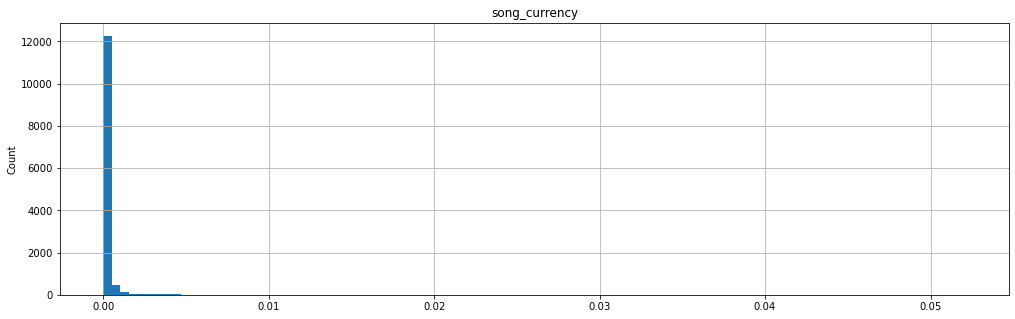

In [114]:
social_features['song_currency'].hist(bins=100)
plt.title("song_currency")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

song_currency su internet ho trovato che significa "quanto recentemente è diventata famosa la track"

valori vicinissimi allo zero

max value 0.05

## song_hotttnesss

In [115]:
social_features['song_hotttnesss'].value_counts()

0.000000    8303
0.040280     241
0.043313     233
0.038550     231
0.037729     171
            ... 
0.012145       1
0.045813       1
0.310098       1
0.071907       1
0.227788       1
Name: song_hotttnesss, Length: 1403, dtype: int64

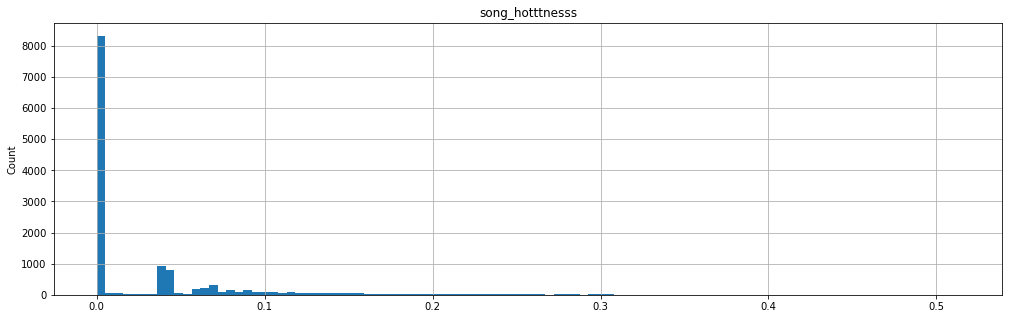

In [116]:
social_features['song_hotttnesss'].hist(bins=100)
plt.title("song_hotttnesss")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

song_hotttnesss attributo che dovrebbe indicare quanto è in classifica e quanto è ascoltata in radio la track

valori vicinissimi allo 0

media 0.03


(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

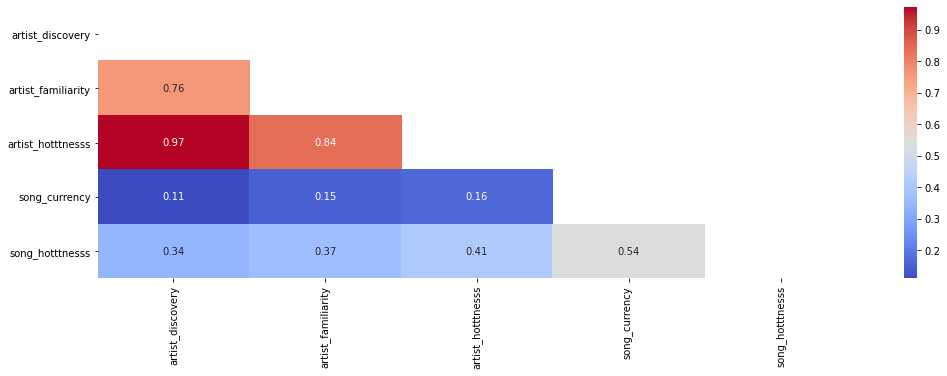

In [17]:
corr=social_features.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask);
plt.xticks(rotation=90)

## temporal_features

In [119]:
temporal_features=echonest['echonest','temporal_features'] 

In [120]:
temporal_features.head()

,000,001,002,003,004,005,006,007,008,009,...,214,215,216,217,218,219,220,221,222,223
track_id,,,,,,,,,,,,,,,,,,,,,
2,0.877233,0.588911,0.354243,0.295090,0.298413,0.309430,0.304496,0.334579,0.249495,0.259656,...,-1.992303,6.805694,0.233070,0.192880,0.027455,0.06408,3.67696,3.61288,13.316690,262.929749
3,0.534429,0.537414,0.443299,0.390879,0.344573,0.366448,0.419455,0.747766,0.460901,0.392379,...,-1.582331,8.889308,0.258464,0.220905,0.081368,0.06413,6.08277,6.01864,16.673548,325.581085
5,0.548093,0.720192,0.389257,0.344934,0.361300,0.402543,0.434044,0.388137,0.512487,0.525755,...,-2.288358,11.527109,0.256821,0.237820,0.060122,0.06014,5.92649,5.86635,16.013849,356.755737
10,0.311404,0.711402,0.321914,0.500601,0.250963,0.321316,0.734250,0.325188,0.373012,0.235840,...,-3.662988,21.508228,0.283352,0.267070,0.125704,0.08082,8.41401,8.33319,21.317064,483.403809
134,0.610849,0.569169,0.428494,0.345796,0.376920,0.460590,0.401371,0.449900,0.428946,0.446736,...,-1.452696,2.356398,0.234686,0.199550,0.149332,0.06440,11.26707,11.20267,26.454180,751.147705


In [121]:
temporal_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 2 to 124911
Columns: 224 entries, 000 to 223
dtypes: float64(224)
memory usage: 23.2 MB


In [122]:
temporal_features.isnull().sum()

000    0
001    0
002    0
003    0
004    0
005    0
006    0
007    0
008    0
009    0
010    0
011    0
012    0
013    0
014    0
015    0
016    0
017    0
018    0
019    0
020    0
021    0
022    0
023    0
024    0
025    0
026    0
027    0
028    0
029    0
030    0
031    0
032    0
033    0
034    0
035    0
036    0
037    0
038    0
039    0
040    0
041    0
042    0
043    0
044    0
045    0
046    0
047    0
048    0
049    0
050    0
051    0
052    0
053    0
054    0
055    0
056    0
057    0
058    0
059    0
060    0
061    0
062    0
063    0
064    0
065    0
066    0
067    0
068    0
069    0
070    0
071    0
072    0
073    0
074    0
075    0
076    0
077    0
078    0
079    0
080    0
081    0
082    0
083    0
084    0
085    0
086    0
087    0
088    0
089    0
090    0
091    0
092    0
093    0
094    0
095    0
096    0
097    0
098    0
099    0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [123]:
temporal_features.describe()

,000,001,002,003,004,005,006,007,008,009,...,214,215,216,217,218,219,220,221,222,223
count,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,...,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000
mean,0.448356,0.435871,0.365206,0.306067,0.365518,0.325732,0.332409,0.357958,0.321880,0.358277,...,-1.966002,10.745951,0.308984,0.255381,0.163876,0.068526,4.183428,4.114902,7.605432,138.932366
std,0.164809,0.166433,0.132484,0.118799,0.139493,0.124826,0.124180,0.131269,0.123401,0.134563,...,1.708499,20.053146,0.140164,0.083731,3.484144,0.010930,4.967481,4.967004,6.444884,225.584951
min,0.022635,0.020016,0.015092,0.014307,0.032791,0.014088,0.011858,0.011821,0.015987,0.006663,...,-17.966162,-1.867880,0.129023,0.098280,0.000518,0.060000,0.322180,0.224580,-3.566834,-1.687834
25%,0.332359,0.316432,0.275173,0.224428,0.268218,0.238666,0.246155,0.266214,0.235385,0.266039,...,-2.587326,1.229409,0.242371,0.208750,0.021321,0.063080,1.817050,1.749660,2.866906,15.565598
50%,0.445567,0.432219,0.355969,0.297733,0.352954,0.318924,0.325449,0.349882,0.313062,0.347999,...,-1.565120,4.355214,0.286014,0.242745,0.042146,0.064490,3.094060,3.026260,5.502340,55.874954
75%,0.560145,0.551585,0.442907,0.376437,0.448581,0.401922,0.408836,0.436413,0.397767,0.437743,...,-0.875471,11.407599,0.339086,0.285305,0.087516,0.070070,5.147530,5.079770,10.597994,175.938553
max,0.998426,0.985372,0.996535,0.990182,0.967532,0.950671,0.967767,0.991516,0.917841,0.939243,...,1.663782,423.621094,5.211423,1.680570,375.744781,0.342000,226.326767,226.244080,67.041878,4790.696777


temporal features that were recorded using the echonest project to capture the features of a song

## RISULTATI

In [126]:
echonest.columns.tolist()

[('echonest', 'audio_features', 'acousticness'),
 ('echonest', 'audio_features', 'danceability'),
 ('echonest', 'audio_features', 'energy'),
 ('echonest', 'audio_features', 'instrumentalness'),
 ('echonest', 'audio_features', 'liveness'),
 ('echonest', 'audio_features', 'speechiness'),
 ('echonest', 'audio_features', 'tempo'),
 ('echonest', 'audio_features', 'valence'),
 ('echonest', 'metadata', 'album_date'),
 ('echonest', 'metadata', 'album_name'),
 ('echonest', 'metadata', 'artist_latitude'),
 ('echonest', 'metadata', 'artist_location'),
 ('echonest', 'metadata', 'artist_longitude'),
 ('echonest', 'metadata', 'artist_name'),
 ('echonest', 'metadata', 'release'),
 ('echonest', 'ranks', 'artist_discovery_rank'),
 ('echonest', 'ranks', 'artist_familiarity_rank'),
 ('echonest', 'ranks', 'artist_hotttnesss_rank'),
 ('echonest', 'ranks', 'song_currency_rank'),
 ('echonest', 'ranks', 'song_hotttnesss_rank'),
 ('echonest', 'social_features', 'artist_discovery'),
 ('echonest', 'social_featur

## ELIMINO GLI ATTRIBUTI DI METADATA PERCHE' NON PRECISI COME QUELLI IN TRACKS E GLI ATTRIBUTI RANKS PER I TROPPI NULL VALUE

In [129]:
echonestNew=echonest.drop([('echonest', 'metadata', 'album_date'),
 ('echonest', 'metadata', 'album_name'),
 ('echonest', 'metadata', 'artist_latitude'),
 ('echonest', 'metadata', 'artist_location'),
 ('echonest', 'metadata', 'artist_longitude'),
 ('echonest', 'metadata', 'artist_name'),
 ('echonest', 'metadata', 'release'),
 ('echonest', 'ranks', 'artist_discovery_rank'),
 ('echonest', 'ranks', 'artist_familiarity_rank'),
 ('echonest', 'ranks', 'artist_hotttnesss_rank'),
 ('echonest', 'ranks', 'song_currency_rank'),
 ('echonest', 'ranks', 'song_hotttnesss_rank')], axis = 1)

In [130]:
echonestNew.columns.tolist()

[('echonest', 'audio_features', 'acousticness'),
 ('echonest', 'audio_features', 'danceability'),
 ('echonest', 'audio_features', 'energy'),
 ('echonest', 'audio_features', 'instrumentalness'),
 ('echonest', 'audio_features', 'liveness'),
 ('echonest', 'audio_features', 'speechiness'),
 ('echonest', 'audio_features', 'tempo'),
 ('echonest', 'audio_features', 'valence'),
 ('echonest', 'social_features', 'artist_discovery'),
 ('echonest', 'social_features', 'artist_familiarity'),
 ('echonest', 'social_features', 'artist_hotttnesss'),
 ('echonest', 'social_features', 'song_currency'),
 ('echonest', 'social_features', 'song_hotttnesss'),
 ('echonest', 'temporal_features', '000'),
 ('echonest', 'temporal_features', '001'),
 ('echonest', 'temporal_features', '002'),
 ('echonest', 'temporal_features', '003'),
 ('echonest', 'temporal_features', '004'),
 ('echonest', 'temporal_features', '005'),
 ('echonest', 'temporal_features', '006'),
 ('echonest', 'temporal_features', '007'),
 ('echonest', 

In [131]:
echonestNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 2 to 124911
Columns: 237 entries, ('echonest', 'audio_features', 'acousticness') to ('echonest', 'temporal_features', '223')
dtypes: float64(237)
memory usage: 24.5 MB


In [132]:
audio_features=echonest['echonest','audio_features']

In [133]:
audio_features.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

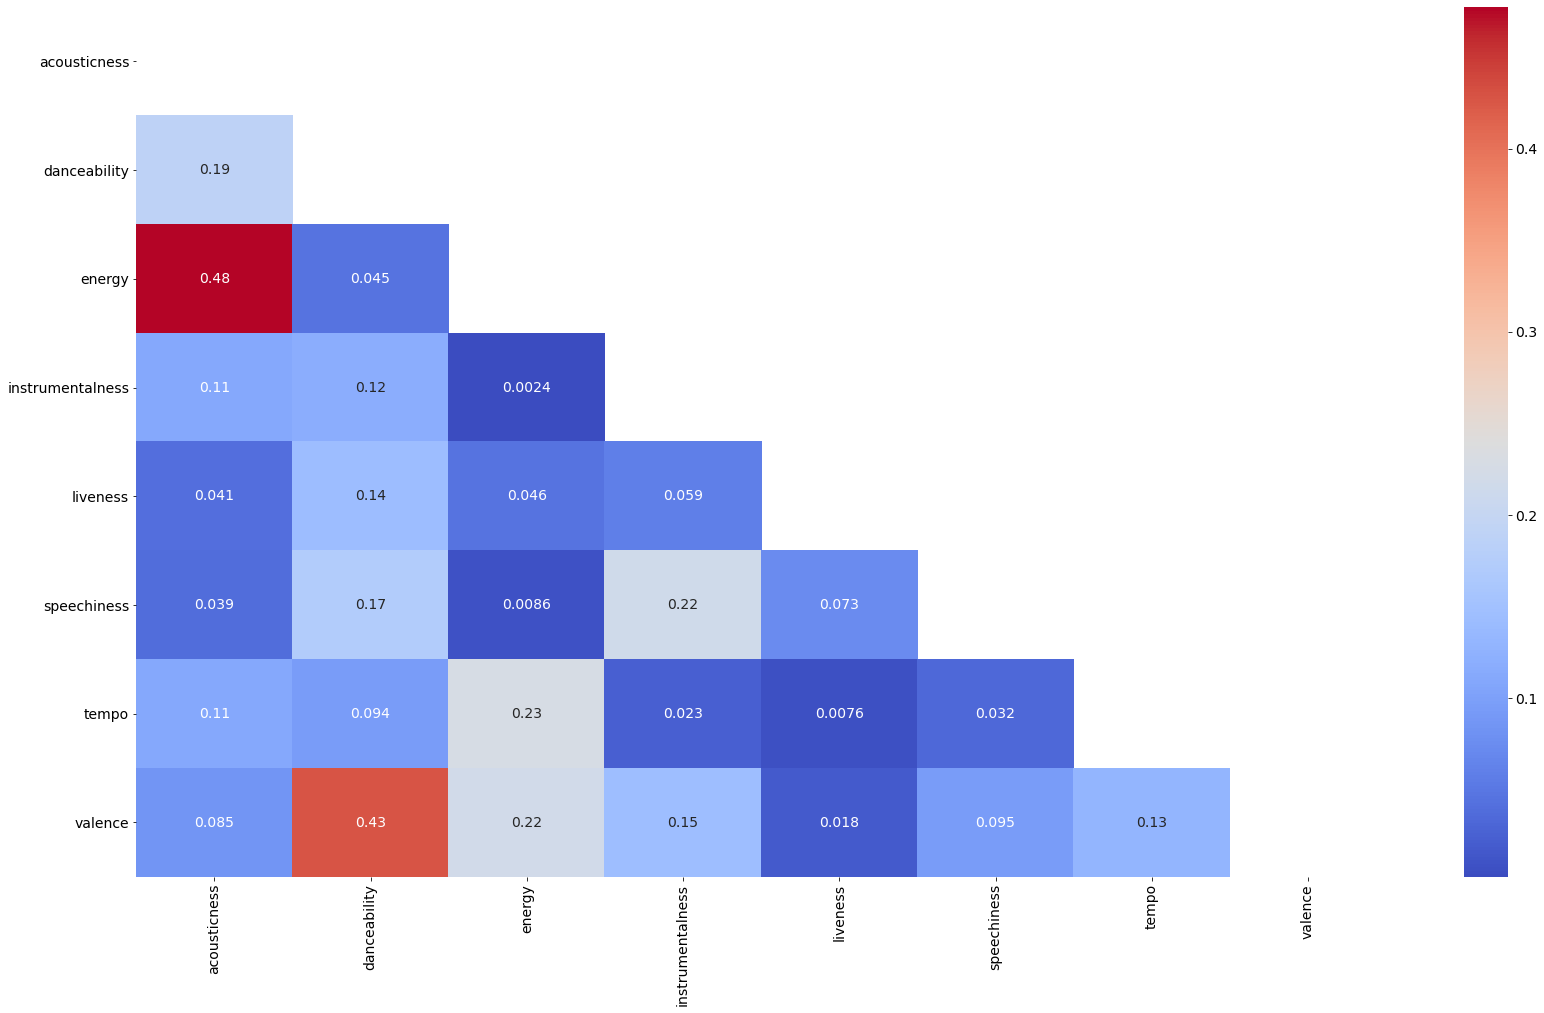

In [134]:

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(28,16))
#plt.yticks(rotation=0) 
corr=audio_features.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask);
plt.xticks(rotation=90)


## NO CI SONO CORRELAZIONI TRA GLI ATTRIBUTI DI audio_features, PROVO A VEDERE SE NON CI SONO NEANCHE CONSIDERANDO SOLO IL SUBSET MEDIUM E SMALL DEI DATI

In [140]:
dbMerge = pd.merge(tracks, audio_features, left_index=True, right_index=True)


C:\Users\Federico\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [141]:
dbMerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 2 to 124911
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   (album, comments)            13129 non-null  int64         
 1   (album, date_created)        12938 non-null  datetime64[ns]
 2   (album, date_released)       9312 non-null   datetime64[ns]
 3   (album, engineer)            2903 non-null   object        
 4   (album, favorites)           13129 non-null  int64         
 5   (album, id)                  13129 non-null  int64         
 6   (album, information)         10581 non-null  category      
 7   (album, listens)             13129 non-null  int64         
 8   (album, producer)            2945 non-null   object        
 9   (album, tags)                13129 non-null  object        
 10  (album, title)               13129 non-null  object        
 11  (album, tracks)              13129 non-n

In [142]:
dbMerge.columns.tolist()

[('album', 'comments'),
 ('album', 'date_created'),
 ('album', 'date_released'),
 ('album', 'engineer'),
 ('album', 'favorites'),
 ('album', 'id'),
 ('album', 'information'),
 ('album', 'listens'),
 ('album', 'producer'),
 ('album', 'tags'),
 ('album', 'title'),
 ('album', 'tracks'),
 ('album', 'type'),
 ('artist', 'active_year_begin'),
 ('artist', 'active_year_end'),
 ('artist', 'associated_labels'),
 ('artist', 'bio'),
 ('artist', 'comments'),
 ('artist', 'date_created'),
 ('artist', 'favorites'),
 ('artist', 'id'),
 ('artist', 'latitude'),
 ('artist', 'location'),
 ('artist', 'longitude'),
 ('artist', 'members'),
 ('artist', 'name'),
 ('artist', 'related_projects'),
 ('artist', 'tags'),
 ('artist', 'website'),
 ('artist', 'wikipedia_page'),
 ('set', 'split'),
 ('set', 'subset'),
 ('track', 'bit_rate'),
 ('track', 'comments'),
 ('track', 'composer'),
 ('track', 'date_created'),
 ('track', 'date_recorded'),
 ('track', 'duration'),
 ('track', 'favorites'),
 ('track', 'genre_top'),
 ('t

In [143]:
dbMerge.head()

,"(album, comments)","(album, date_created)","(album, date_released)","(album, engineer)","(album, favorites)","(album, id)","(album, information)","(album, listens)","(album, producer)","(album, tags)",...,"(track, tags)","(track, title)",acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,,,,,,,,,,,,,,,,,,,,,
2,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,[],Food,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
3,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,[],Electric Ave,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
5,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,[],This World,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
10,0,2008-11-26 01:45:08,2008-02-06,NaN,4,6,NaN,47632,NaN,[],...,[],Freeway,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
134,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,[],Street Music,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [145]:
mediumSet=dbMerge.loc[dbMerge[('set','subset')] != 'large']

In [146]:
mediumSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5281 entries, 2 to 124402
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   (album, comments)            5281 non-null   int64         
 1   (album, date_created)        5281 non-null   datetime64[ns]
 2   (album, date_released)       3734 non-null   datetime64[ns]
 3   (album, engineer)            1092 non-null   object        
 4   (album, favorites)           5281 non-null   int64         
 5   (album, id)                  5281 non-null   int64         
 6   (album, information)         4247 non-null   category      
 7   (album, listens)             5281 non-null   int64         
 8   (album, producer)            1136 non-null   object        
 9   (album, tags)                5281 non-null   object        
 10  (album, title)               5281 non-null   object        
 11  (album, tracks)              5281 non-nul

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

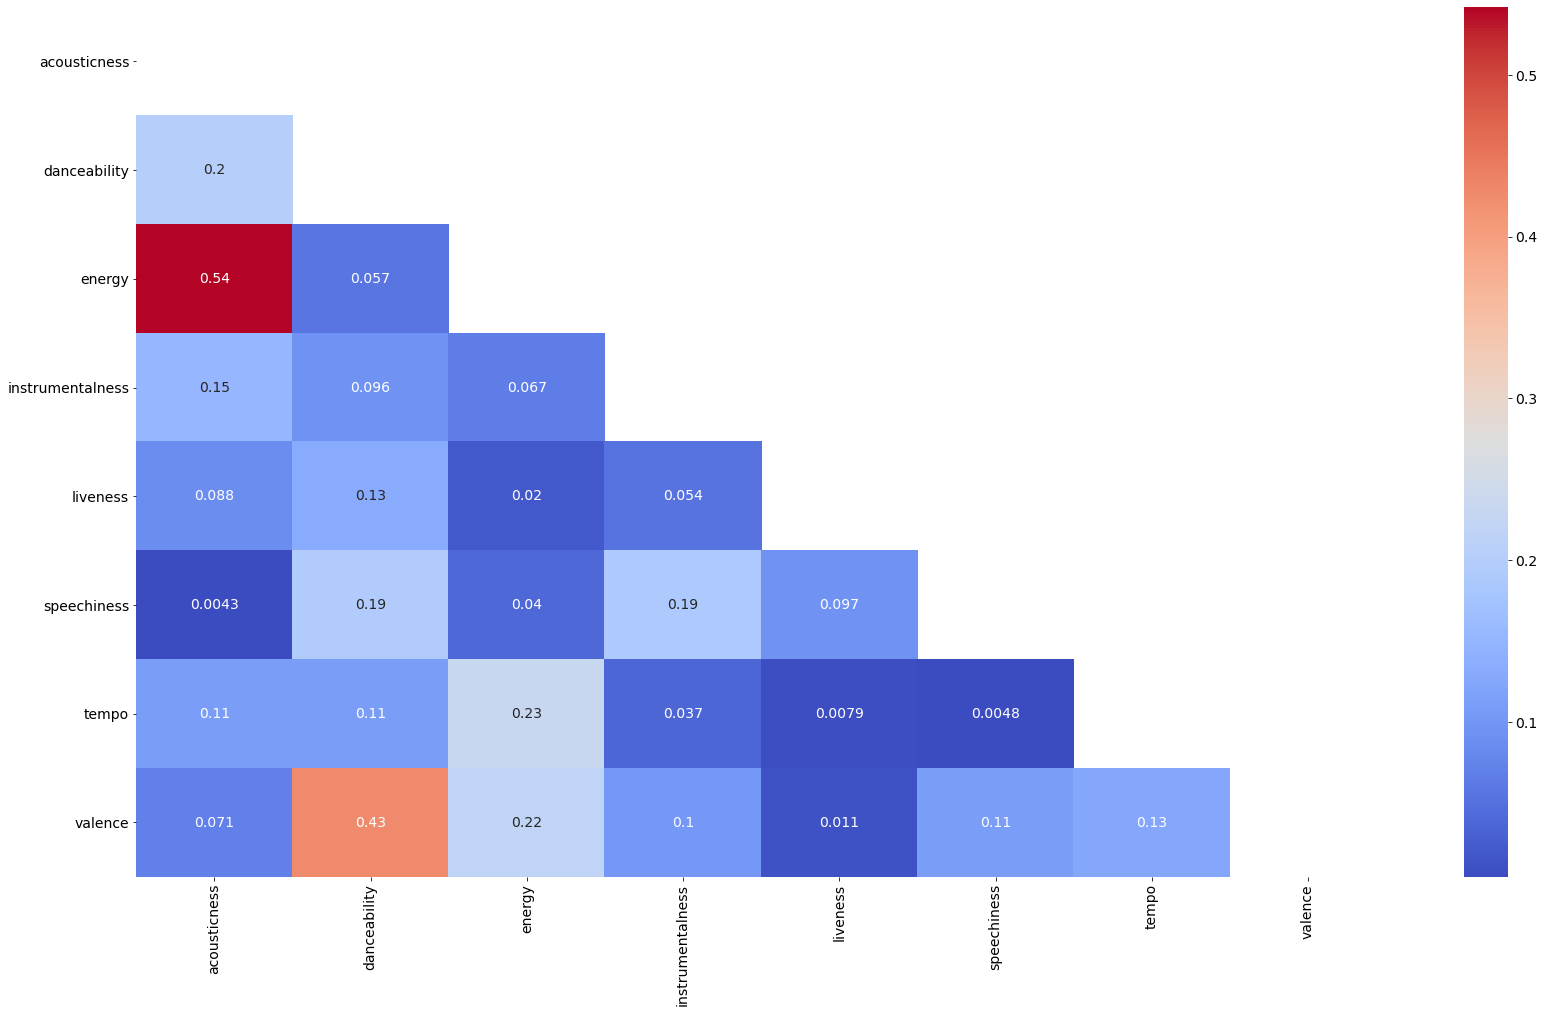

In [147]:
dbMedium=mediumSet[['acousticness', 'danceability', 'energy','instrumentalness','liveness','speechiness','tempo','valence']]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(28,16))
#plt.yticks(rotation=0) 
corr=dbMedium.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask);
plt.xticks(rotation=90)


## NEANCHE TOLTE LE TRACKS APPARTENENTI AL SUBSET LARGE CI SONO CORRELAZIONI TRA GLI ATTRIBUTI DI audio_features

In [148]:
social_features=echonest['echonest','social_features'] 

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

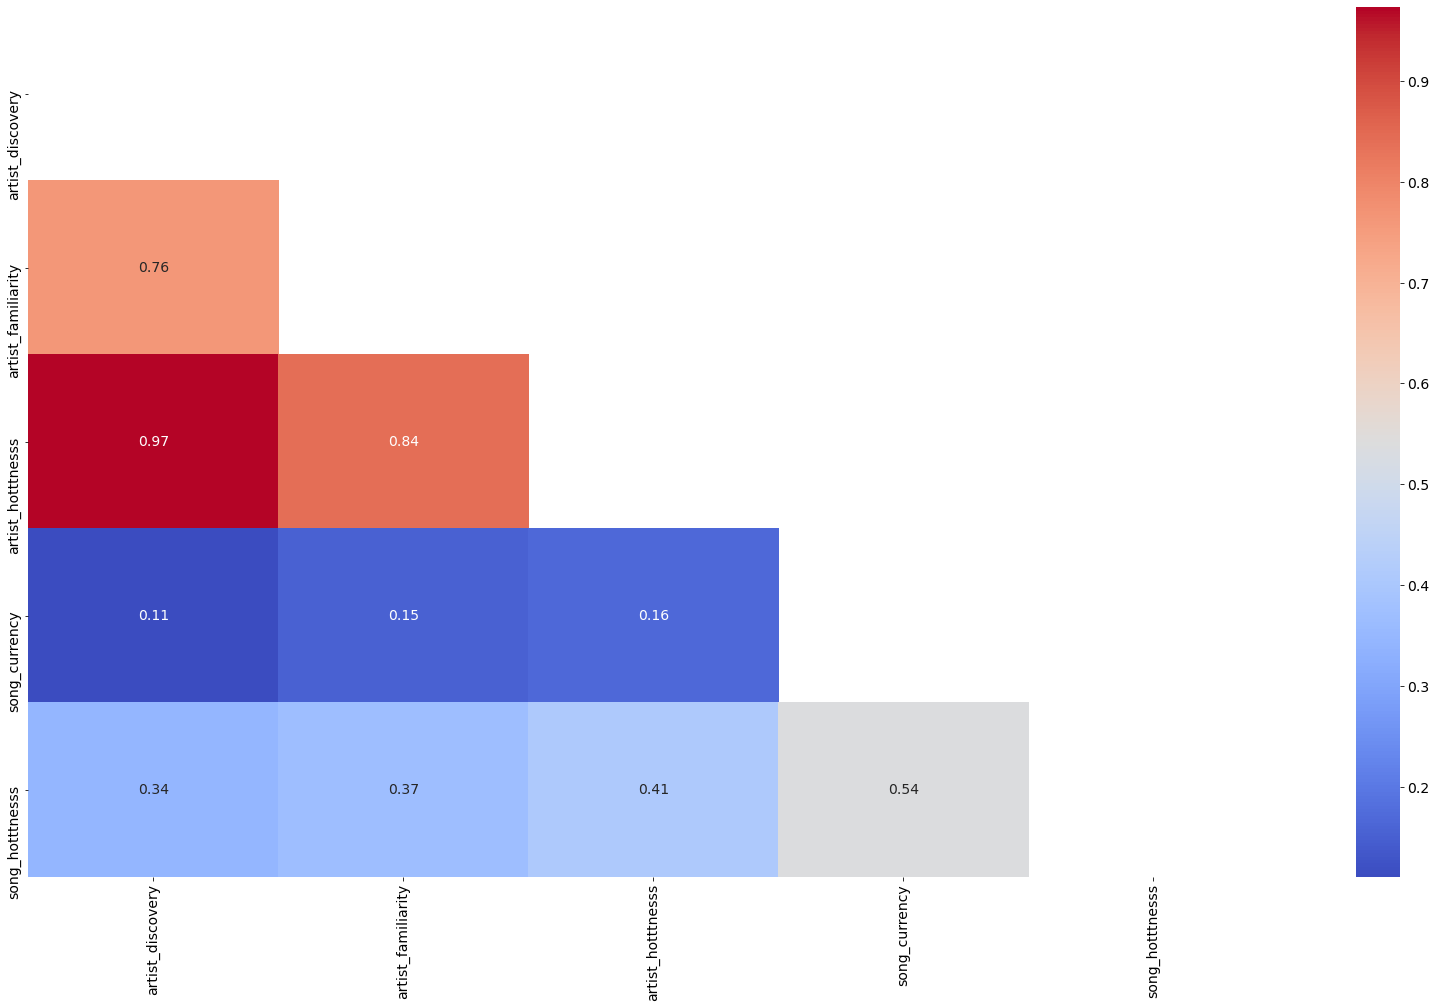

In [149]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(28,16))
#plt.yticks(rotation=0) 
corr=social_features.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask);
plt.xticks(rotation=90)


## FORTE CORRELAZIONI TRA ALCUNI ATTRIBUTI DI social_features. IN PARTICOLARE TRA artist_discovery, artist_familiarity, artist_hotttnesss. CONTROLLO SE QUESTO ACCADE ANCHE TOLTO IL SUBSET LARGE ED ELIMINANDO GLI ARTIST ID CHE SI RIPETONO

In [151]:
dbMergesocial_features = pd.merge(tracks, social_features, left_index=True, right_index=True)
dbMergesocial_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 2 to 124911
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   (album, comments)            13129 non-null  int64         
 1   (album, date_created)        12938 non-null  datetime64[ns]
 2   (album, date_released)       9312 non-null   datetime64[ns]
 3   (album, engineer)            2903 non-null   object        
 4   (album, favorites)           13129 non-null  int64         
 5   (album, id)                  13129 non-null  int64         
 6   (album, information)         10581 non-null  category      
 7   (album, listens)             13129 non-null  int64         
 8   (album, producer)            2945 non-null   object        
 9   (album, tags)                13129 non-null  object        
 10  (album, title)               13129 non-null  object        
 11  (album, tracks)              13129 non-n

In [154]:

dbMergeSetArtistId=dbMergesocial_features[['artist_discovery', 'artist_familiarity', 'artist_hotttnesss','song_currency','song_hotttnesss',('artist', 'id'),('set','subset') ]]
dbMergeSetArtistId=dbMergeSetArtistId.loc[dbMergeSetArtistId[('set','subset')] != 'large']

In [155]:
dbMergeSetArtistId.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5281 entries, 2 to 124402
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   artist_discovery    5281 non-null   float64 
 1   artist_familiarity  5281 non-null   float64 
 2   artist_hotttnesss   5281 non-null   float64 
 3   song_currency       5281 non-null   float64 
 4   song_hotttnesss     5281 non-null   float64 
 5   (artist, id)        5281 non-null   int64   
 6   (set, subset)       5281 non-null   category
dtypes: category(1), float64(5), int64(1)
memory usage: 294.1 KB


In [157]:
dbMergeSetArtistId=dbMergeSetArtistId.drop_duplicates()
dbMergeSetArtistId.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3222 entries, 2 to 124397
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   artist_discovery    3222 non-null   float64 
 1   artist_familiarity  3222 non-null   float64 
 2   artist_hotttnesss   3222 non-null   float64 
 3   song_currency       3222 non-null   float64 
 4   song_hotttnesss     3222 non-null   float64 
 5   (artist, id)        3222 non-null   int64   
 6   (set, subset)       3222 non-null   category
dtypes: category(1), float64(5), int64(1)
memory usage: 179.5 KB


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 6 Text major ticklabel objects>)

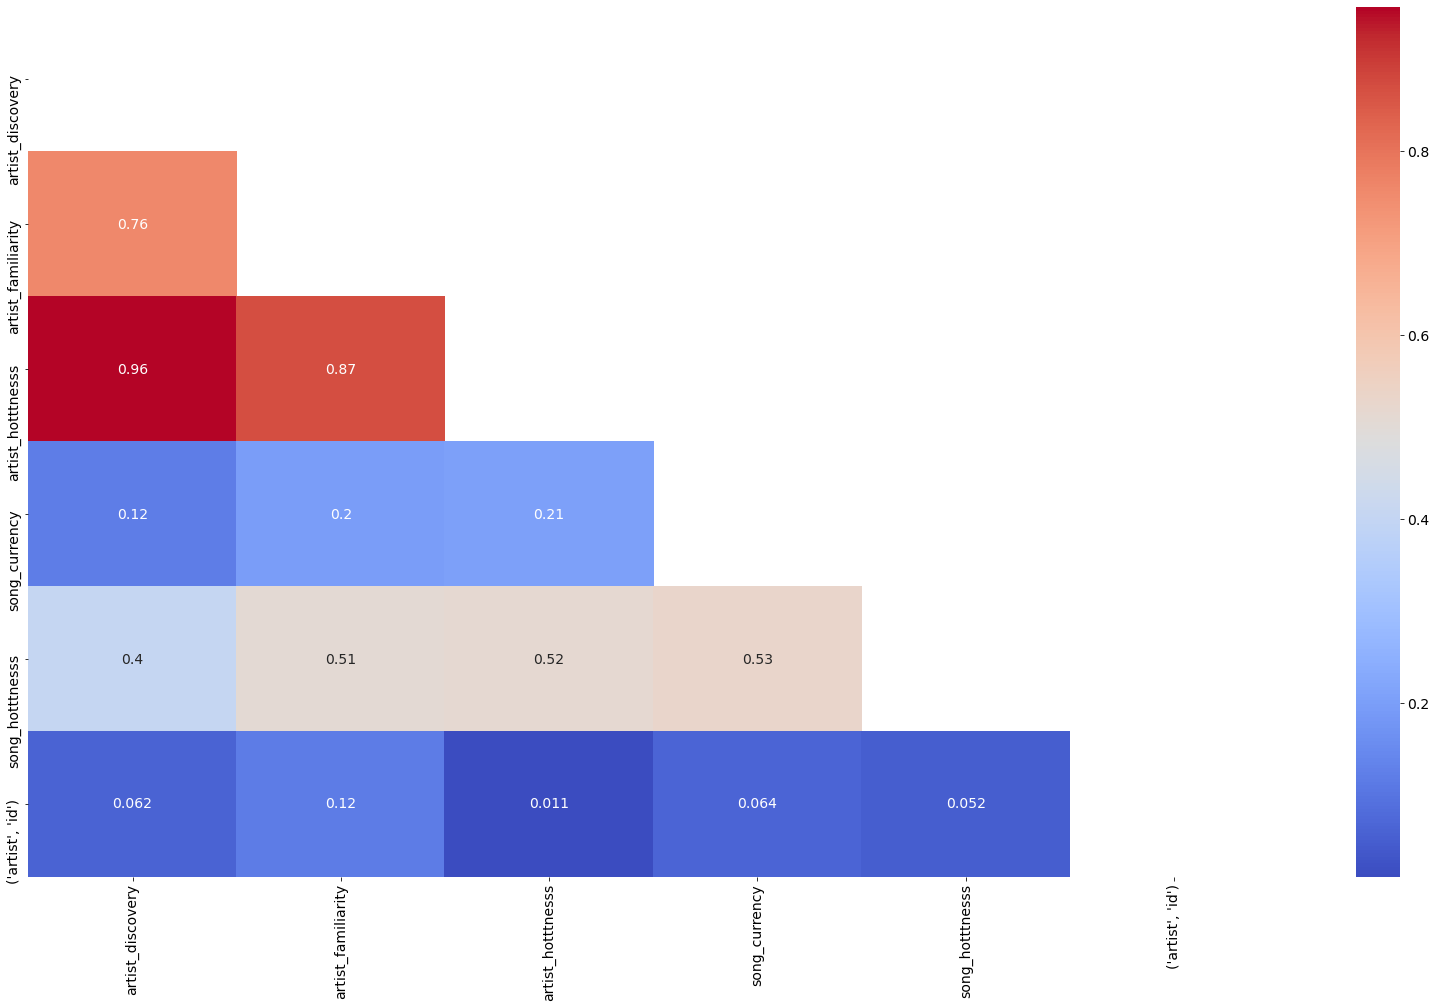

In [158]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(28,16))
#plt.yticks(rotation=0) 
corr=dbMergeSetArtistId.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask);
plt.xticks(rotation=90)

## SI MANTENGONO LE CORRELAZIONI OSSERVATE PRIMA ANCHE TOGLIENDO I RECORD IN SUBSET LARGE E ELIMINANDO I DUPLICATI DI ARTIST ID

In [160]:
dbMerge.columns.tolist()

[('album', 'comments'),
 ('album', 'date_created'),
 ('album', 'date_released'),
 ('album', 'engineer'),
 ('album', 'favorites'),
 ('album', 'id'),
 ('album', 'information'),
 ('album', 'listens'),
 ('album', 'producer'),
 ('album', 'tags'),
 ('album', 'title'),
 ('album', 'tracks'),
 ('album', 'type'),
 ('artist', 'active_year_begin'),
 ('artist', 'active_year_end'),
 ('artist', 'associated_labels'),
 ('artist', 'bio'),
 ('artist', 'comments'),
 ('artist', 'date_created'),
 ('artist', 'favorites'),
 ('artist', 'id'),
 ('artist', 'latitude'),
 ('artist', 'location'),
 ('artist', 'longitude'),
 ('artist', 'members'),
 ('artist', 'name'),
 ('artist', 'related_projects'),
 ('artist', 'tags'),
 ('artist', 'website'),
 ('artist', 'wikipedia_page'),
 ('set', 'split'),
 ('set', 'subset'),
 ('track', 'bit_rate'),
 ('track', 'comments'),
 ('track', 'composer'),
 ('track', 'date_created'),
 ('track', 'date_recorded'),
 ('track', 'duration'),
 ('track', 'favorites'),
 ('track', 'genre_top'),
 ('t

In [161]:
dbMerge[('track', 'duration')].value_counts()

230     72
210     71
186     70
192     69
190     69
        ..
2293     1
2357     1
516      1
532      1
2065     1
Name: (track, duration), Length: 862, dtype: int64

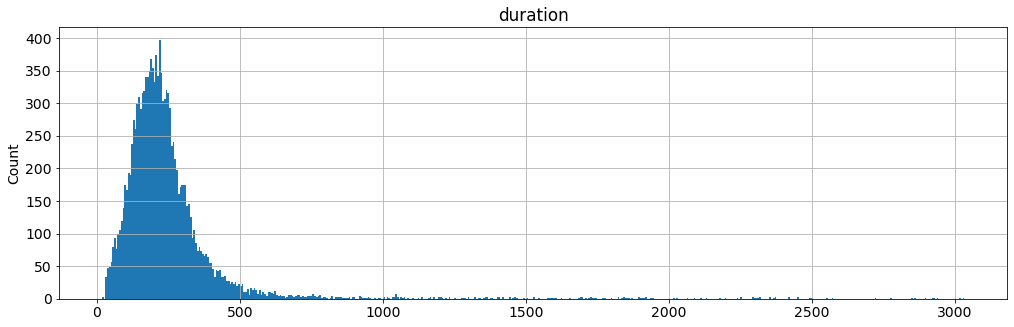

In [163]:
dbMerge[('track', 'duration')].hist(bins=500)
plt.title("duration")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

## guardando duration solo delle track presenti in echonest si osserva che ci sono anche tracks che durano meno di 223 secondi quindi temporal features con i suoi 224 valori non può essere ogni secondo della canzone